In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data
# Sourced from Kaggle
# https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
data = pd.read_csv('data/SpotifyFeatures.csv')
data_sample = data.head()

# Selecting the columns to look at
selected_data = data.loc[:, ['genre', 'artist_name', 'track_name', 'popularity', 'duration_ms', 'key', 'tempo']].dropna()
# Removing any duplicates
final_selected_data = selected_data.drop_duplicates(subset=['track_name'])
# Sorting the data by popularity (Highest to Lowest)
final_selected_data = final_selected_data.sort_values(by='popularity', ascending=False)

# GRAPHS

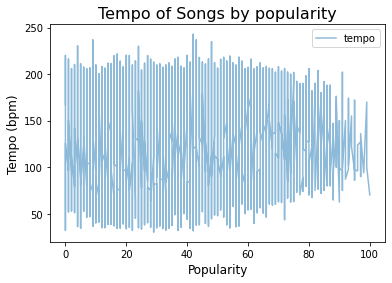

In [2]:
# Tempo vs Popularity
# Bar plot of Tempo of Songs and Popularity
ax = final_selected_data.plot(x='popularity', y='tempo', alpha=0.5)
# Set labels
ax.set_xlabel( "Popularity" , size = 12 )
ax.set_ylabel( "Tempo (bpm)" , size = 12 )
ax.set_title( "Tempo of Songs by popularity" , size = 16 )
plt.show()

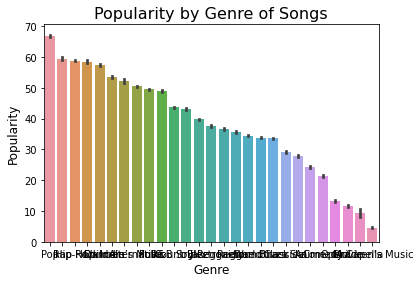

In [3]:
# Genre vs Popularity
plot_data = final_selected_data.loc[:, ['genre', 'popularity']]
plot_group = plot_data.groupby(["genre"])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity', ascending=False)
# Bar plot of Genre of Songs and Popularity
ax1 = sns.barplot(x='genre', y="popularity", data=plot_data, order=plot_group['genre'])
# Set labels
ax1.set_xlabel( "Genre" , size = 12 )
ax1.set_ylabel( "Popularity" , size = 12 )
ax1.set_title( "Popularity by Genre of Songs" , size = 16 )
plt.show()

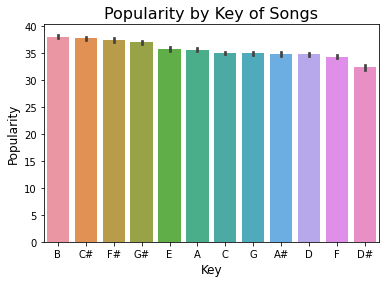

In [4]:
# Key vs Popularity
plot_data2 = final_selected_data.loc[:, ['key', 'popularity']]
plot_group2 = plot_data2.groupby(["key"])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity', ascending=False)
# Bar plot of Keys of Songs and Popularity
ax2 = sns.barplot(x='key', y="popularity", data=plot_data2, order=plot_group2['key'])
# Set labels
ax2.set_xlabel( "Key" , size = 12 )
ax2.set_ylabel( "Popularity" , size = 12 )
ax2.set_title( "Popularity by Key of Songs" , size = 16 )
plt.show()

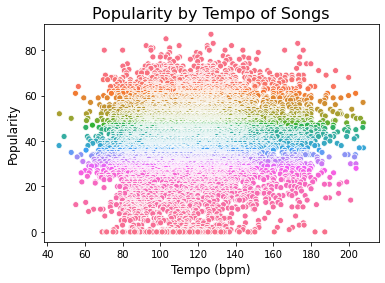

                  artist_name  popularity     tempo
9186               Pedro Capó        87.0  126.9125
7667           Mario Bautista        85.0  103.0090
7717            Martin Garrix        83.0  128.0855
7819              Mau y Ricky        83.0  172.9930
1346            Billie Eilish        82.0  124.9090
6637     Kris Kross Amsterdam        82.0  109.9890
668                    Anitta        82.0   92.4810
8667                    Ninho        82.0  137.8340
9021              Paloma Mami        81.0   96.0560
4884          Heuss L'enfoiré        81.0  125.0090
6439                Kenny Man        81.0  104.9805
10753             Sofia Reyes        81.0   94.9680
5275                   JENNIE        80.0   95.0450
9616                     Ramz        80.0   70.2310
9555           Rachel Platten        80.0  175.9240
58              4 Non Blondes        80.0  134.3690
13482             juan karlos        80.0  126.0080
6930                Lele Pons        80.0  166.0430
2523        

In [5]:
# Tempo vs Popularity
plot_data3 = final_selected_data.loc[:, ['artist_name', 'popularity','tempo']]
plot_group3 = plot_data3.groupby('artist_name', as_index=False)['popularity','tempo'].aggregate(np.median).sort_values('popularity', ascending=False)
# Scatter plot of Tempo and Popularity for Artists
ax3 = sns.scatterplot(data=plot_group3,x='tempo',y='popularity',hue='artist_name', legend = False)
# Set labels
ax3.set_xlabel( "Tempo (bpm)" , size = 12 )
ax3.set_ylabel( "Popularity" , size = 12 )
ax3.set_title( "Popularity by Tempo of Songs" , size = 16 )
plt.show()
# Raw form of data shown
print(plot_group3)

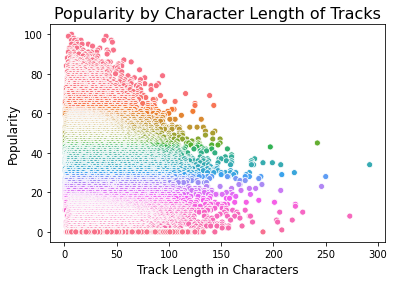

                                               track_name  popularity  \
2189                                              7 rings         100   
142226                                               Wow.          99   
145166           break up with your girlfriend, i'm bored          99   
24523                                           Con Calma          98   
27691              Dancing With A Stranger (with Normani)          97   
18930                                       Calma - Remix          97   
48802                                             Happier          97   
141474                                         Without Me          97   
116138      Sunflower - Spider-Man: Into the Spider-Verse          97   
116974                                   Sweet but Psycho          97   
118565     Taki Taki (with Selena Gomez, Ozuna & Cardi B)          96   
74699                                        MIDDLE CHILD          96   
4402                                           Adan

In [6]:
# Track length (characters) vs Popularity
plot_data4 = final_selected_data.loc[:, ['track_name', 'popularity']]
plot_data4['track_length']=plot_data4.apply(lambda row: len(row.track_name), axis=1)
plot_group4 = plot_data4.groupby('track_name', as_index=False)['popularity','track_length'].aggregate(np.median).sort_values('popularity', ascending=False)
# Scatter plot of Song Name Length and Popularity
ax4 = sns.scatterplot(data=plot_group4,x='track_length',y='popularity',hue='track_name', legend=False)
# Set labels
ax4.set_xlabel( "Track Length in Characters" , size = 12 )
ax4.set_ylabel( "Popularity" , size = 12 )
ax4.set_title( "Popularity by Character Length of Tracks" , size = 16 )
plt.show()
# Raw form of data shown
print(plot_group4)

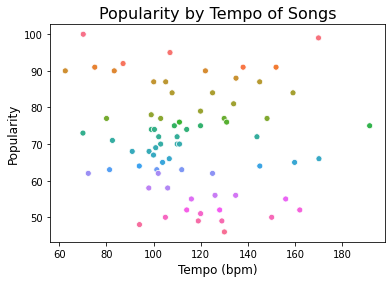

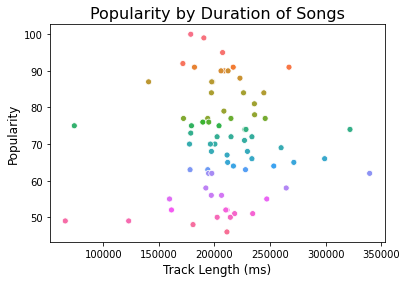

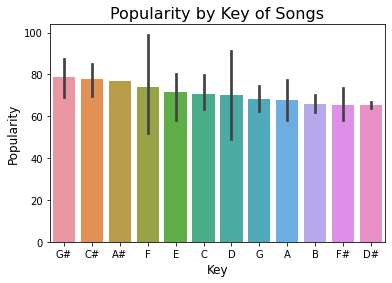

   key  popularity
11  G#   78.800000
4   C#   77.833333
1   A#   77.000000
8    F   74.000000
7    E   71.500000
3    C   70.800000
5    D   70.000000
10   G   68.428571
0    A   67.800000
2    B   66.000000
9   F#   65.583333
6   D#   65.500000


In [7]:
# Ariana Grande Popularity
plot_data5 = final_selected_data.loc[:, ['track_name','artist_name', 'popularity','tempo','genre','duration_ms','key']]
plot_data5=plot_data5[plot_data5.artist_name=='Ariana Grande']
plot_group5 = plot_data5.groupby(["key"])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity', ascending=False)
# Scatter plot of Tempo and Popularity for Ariana Grande's tracks
ax5 = sns.scatterplot(data=plot_data5,x='tempo',y='popularity',hue='track_name', legend=False)
# Set labels
ax5.set_xlabel( "Tempo (bpm)" , size = 12 )
ax5.set_ylabel( "Popularity" , size = 12 )
ax5.set_title( "Popularity by Tempo of Songs" , size = 16 )
plt.show()
# Scatter plot of Song Duration and Popularity for Ariana Grande's tracks
ax6 = sns.scatterplot(data=plot_data5,x='duration_ms',y='popularity',hue='track_name', legend=False)
# Set labels
ax6.set_xlabel( "Track Length (ms)" , size = 12 )
ax6.set_ylabel( "Popularity" , size = 12 )
ax6.set_title( "Popularity by Duration of Songs" , size = 16 )
plt.show()
# Bar plot of Keys of Songs and Popularity for Ariana Grande's tracks
ax7 = sns.barplot(x='key', y="popularity", data=plot_data5, order=plot_group5['key'])
# Set labels
ax7.set_xlabel( "Key" , size = 12 )
ax7.set_ylabel( "Popularity" , size = 12 )
ax7.set_title( "Popularity by Key of Songs" , size = 16 )
plt.show()
# Raw form of data shown
print(plot_group5)